<a href="https://colab.research.google.com/github/CyberMonk999/mnist-digit-classifier/blob/main/ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number recognition using neural nets

The dataset we are using here is MNIST, which is a well-known dataset consisting of handwritten digits from 0 to 9, commonly used to train image classification models. Each image in the dataset is 28 by 28 pixels in size, presented in grayscale format (meaning it has only one channel rather than the three channels of an RGB image) and is labeled with the corresponding digit it represents.

Essentially, each data point consists of a 28x28 grid of pixel intensity values paired with a label indicating the digit, such as 5. MNIST dataset is small and fast to train on. Additionally, it is easy to visualize and works effectively with both dense (fully connected) and convolutional neural networks.

1.At first we start by loading the dataset from Keras library.

In [1]:
from tensorflow.keras.datasets import mnist

2.We do from tensorflow.keras.models import Sequential to bring in the Sequential model class from Keras, which lets us build neural networks layer by layer in order. It provides a simple way to stack layers one after another for most common neural nets. Using Sequential makes creating and managing the model easier and more organized.

In [2]:
from tensorflow.keras.models import Sequential

3.We use `from tensorflow.keras.layers import Dense, Flatten` to import two important types of layers for our neural network. **Dense** layers are the basic building blocks where every neuron connects to all neurons in the previous layer, useful for learning patterns. **Flatten** converts multi-dimensional input (like images) into a one-dimensional array so Dense layers can process it.


In [3]:
from tensorflow.keras.layers import Dense, Flatten

## TEST TRAIN SPLIT

4.The MNIST dataset of handwritten digit is now split into training sets (`x_train`, `y_train`) and testing sets (`x_test`, `y_test`). The training data is used to teach the model, while the testing data checks how well the model learned.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5. Normalizing
This step normalizes the pixel values of the images by dividing them by 255. Since pixel values range from 0 to 255, this scales them down to a range between 0 and 1. Neural networks learn better and faster when input values are small and within a consistent range.


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


6.Neural Net design: After normalizing the images, we build the model that will learn to recognize the digits. First, we tell the model that each image will be a 1D array of 784 numbers (because 28×28 = 784 pixels). Then we stack layers: Flatten() ensures the input is in the right shape (even though it's already flat here), Dense(128, activation='relu') adds 128 "thinking units" (neurons) that learn patterns in the image, and Dense(10, activation='softmax') creates the output layer with 10 options — one for each digit (0–9). This setup allows the model to learn from the image data and make predictions about what digit is shown.










In [12]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(784,)),            # Define input shape here explicitly
                    # Now Flatten doesn’t need input_shape
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


7.Now that you’ve built the neural net, it’s time to bring in a smart coach to help it work better. The compile step is like hiring this coach who tells the model how to improve their work. The optimizer='adam' is this coach who knows the fastest and smartest way to fix mistakes. The loss is like a scoreboard that shows how many errors the builders make when guessing the right output (in this case, the digit). And metrics=['accuracy'] is what the coach uses to keep track of how often the builders guess correctly. So, compiling the model sets up the rules and tools your LEGO team needs to practice and get better at their job

In [13]:
model.compile(
    optimizer='adam',                   # How the model updates itself based on data
    loss='sparse_categorical_crossentropy',  # How to measure mistakes (loss function)
    metrics=['accuracy']                # What we want to keep track of while training
)


In [14]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


8.

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8826 - loss: 0.4203
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9639 - loss: 0.1228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9761 - loss: 0.0804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9830 - loss: 0.0568
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9866 - loss: 0.0446


9.Evaluation of the model

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9736 - loss: 0.0885
Test Accuracy: 0.9775999784469604


The model is predicting with 98 percent accuracy

10. VALIDATION/PREDICTION

In [18]:
predictions = model.predict(x_test)
import numpy as np

predicted_label = np.argmax(predictions[109])  # For the first test image
print("Model Prediction:", predicted_label)
print("Actual Label:", y_test[109])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model Prediction: 4
Actual Label: 4


This means that we have asked the model to try to understand the 4th digit in this data set and it has made accurate prediction. We will plot the result first and then will ask it to recognise first 5 digits in the next step

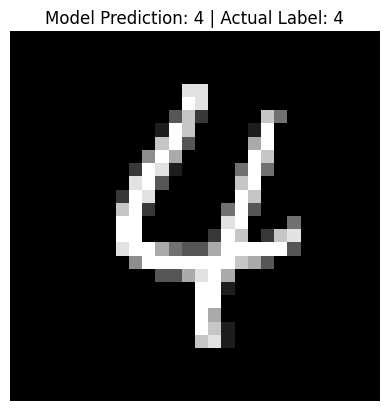

In [19]:
import matplotlib.pyplot as plt

# Reshape the flattened image back to 28x28 for viewing
plt.imshow(x_test[109].reshape(28, 28), cmap='gray')
plt.title(f"Model Prediction: {predicted_label} | Actual Label: {y_test[109]}")
plt.axis('off')
plt.show()


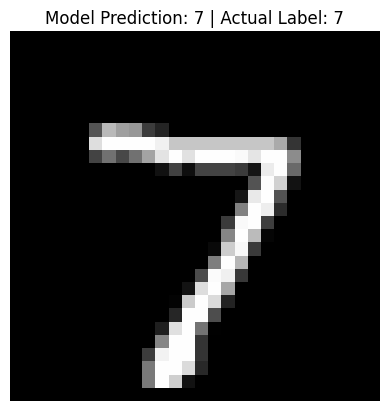

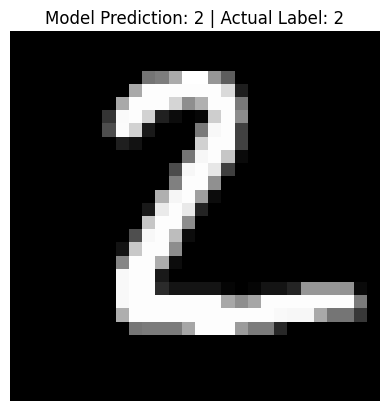

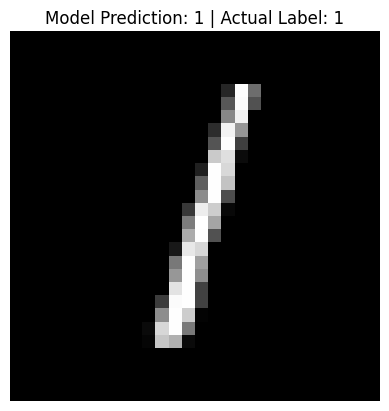

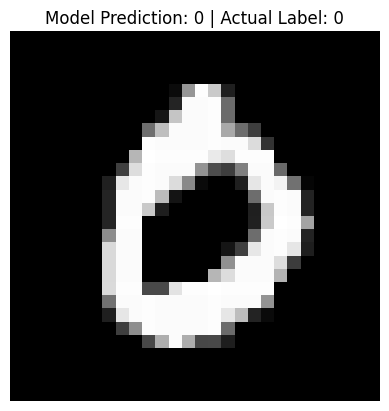

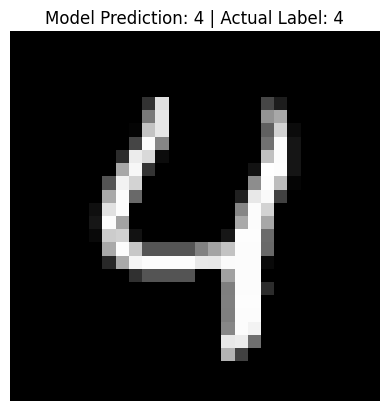

In [20]:
for i in range(5):  # Try first 5 images
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Model Prediction: {np.argmax(predictions[i])} | Actual Label: {y_test[i]}")
    plt.axis('off')
    plt.show()
